This dataset is a list of words and the probabilities that they occur in texts labeled with [disgust, suprise, neutral, sad, happy, anger, fear]. The full dataset contains 23730 words, however this subset contains just over 1100. Ive emailed the guy for the full dataset.

In [1]:
print("test")

test


In [33]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 4)
pd.set_option('display.max_columns',7)

In [44]:
df = pd.read_csv('Andbrain_Dataset.csv')
df.head()

,word,disgust,surprise,...,sad,happy,fear
0,ability,4.4643e-03,0.0478,...,0.0134,0.0159,0.0402
1,able,1.7322e-05,0.0002,...,0.0002,0.0002,0.0002
2,abuse,5.3173e-04,0.0002,...,0.0012,0.0016,0.0027
3,academy,7.1429e-03,0.0214,...,0.0071,0.0929,0.0357
4,accept,8.2707e-03,0.0068,...,0.0188,0.0248,0.0383


In [8]:
print(df.shape)


(1104, 8)


In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   word      1104 non-null   object 
 1   disgust   1104 non-null   float64
 2   surprise  1104 non-null   float64
 3   neutral   1104 non-null   float64
 4   anger     1104 non-null   float64
 5   sad       1104 non-null   float64
 6   happy     1104 non-null   float64
 7   fear      1104 non-null   float64
dtypes: float64(7), object(1)
memory usage: 69.1+ KB
None


In [36]:
ZERO = 10**-7
for c in df:
    for i,r in enumerate(df[c]):
        if type(r) == float and r < ZERO:
            print(f'0 value in {c}: word:{df["word"][i]}')

There are no missing values and no zero probabilities in the tables

In [9]:
df.describe()

,disgust,surprise,neutral,anger,sad,happy,fear
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,0.012809,0.032376,0.008170,0.028224,0.027243,0.033701,0.030917
std,0.015313,0.025154,0.010011,0.024109,0.021836,0.026960,0.024391
min,0.000002,0.000003,0.000032,0.000003,0.000003,0.000003,0.000003
25%,0.002528,0.015640,0.000992,0.011905,0.011905,0.015306,0.014286
50%,0.007937,0.026907,0.003968,0.023810,0.023810,0.027778,0.026316
75%,0.017857,0.041245,0.011905,0.035714,0.035714,0.042857,0.038462
max,0.139456,0.135056,0.035714,0.137363,0.125000,0.137363,0.140538


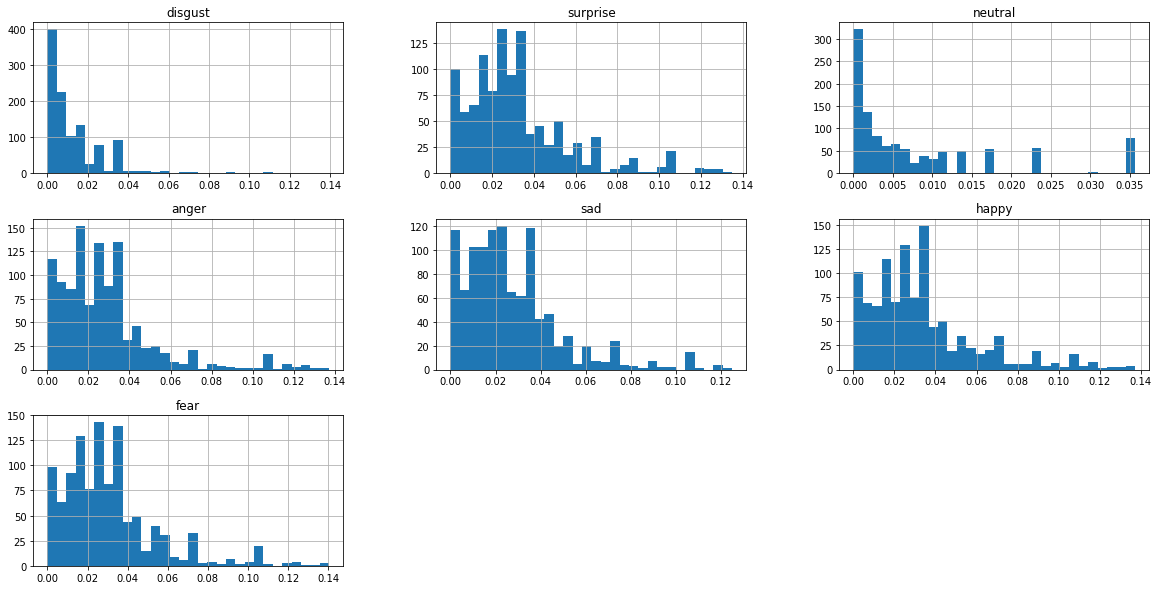

In [38]:
import matplotlib.pyplot as plt
hist = df.hist(bins=30,figsize=(20, 10))

In [32]:
df.cov()

,disgust,surprise,neutral,anger,sad,happy,fear,diffsadanger
disgust,0.000234,0.000057,0.000085,0.000053,0.000050,0.000021,0.000056,0.000016
surprise,0.000057,0.000633,0.000100,-0.000011,0.000057,-0.000044,0.000027,-0.000084
neutral,0.000085,0.000100,0.000100,0.000063,0.000081,0.000049,0.000076,0.000034
anger,0.000053,-0.000011,0.000063,0.000581,0.000020,-0.000077,-0.000035,0.000374
sad,0.000050,0.000057,0.000081,0.000020,0.000477,-0.000050,0.000038,0.000214
happy,0.000021,-0.000044,0.000049,-0.000077,-0.000050,0.000727,-0.000070,-0.000105
fear,0.000056,0.000027,0.000076,-0.000035,0.000038,-0.000070,0.000595,-0.000077
diffsadanger,0.000016,-0.000084,0.000034,0.000374,0.000214,-0.000105,-0.000077,0.000620


In [47]:
epsilon = 10**-5
for i,c in enumerate(df):
    for j,d in enumerate(df):
        if j>i and j>0 and i>0:
            name = 'diff_'+c+"_"+d
            df[name] = abs(df[c] - df[d]) < epsilon
            print(df[name].value_counts(normalize=True))
            del df[name]

    

False    0.8261
True     0.1739
Name: diff_disgust_surprise, dtype: float64
True     0.6024
False    0.3976
Name: diff_disgust_neutral, dtype: float64
False    0.7455
True     0.2545
Name: diff_disgust_anger, dtype: float64
False    0.7636
True     0.2364
Name: diff_disgust_sad, dtype: float64
False    0.7627
True     0.2373
Name: diff_disgust_happy, dtype: float64
False    0.7889
True     0.2111
Name: diff_disgust_fear, dtype: float64
False    0.8342
True     0.1658
Name: diff_surprise_neutral, dtype: float64
False    0.8016
True     0.1984
Name: diff_surprise_anger, dtype: float64
False    0.8016
True     0.1984
Name: diff_surprise_sad, dtype: float64
False    0.827
True     0.173
Name: diff_surprise_happy, dtype: float64
False    0.7989
True     0.2011
Name: diff_surprise_fear, dtype: float64
False    0.74
True     0.26
Name: diff_neutral_anger, dtype: float64
False    0.7618
True     0.2382
Name: diff_neutral_sad, dtype: float64
False    0.788
True     0.212
Name: diff_neutral_happ